<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/session%203%20Probabilities%20and%20Distribution%20Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[4, 6, 6, 8, 4]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

,count
2,0.0281
3,0.0826
4,0.1645
5,0.2751
6,0.4168
7,0.5851
8,0.7178
9,0.8317
10,0.9156
11,0.9720


<Axes: >

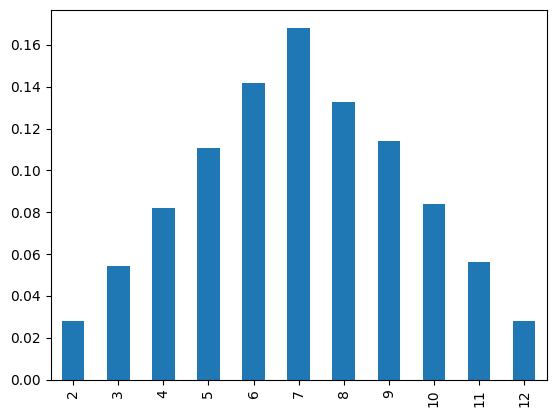

In [8]:
s.plot(kind='bar')

<Axes: >

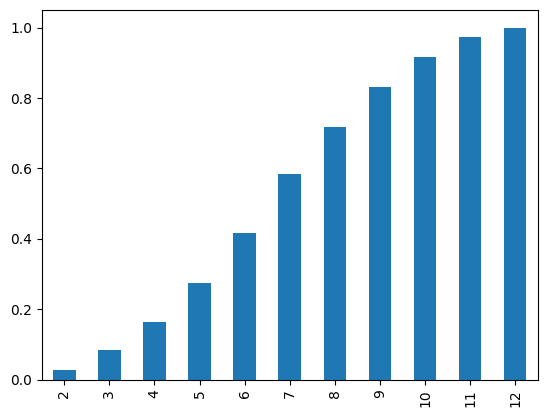

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [11]:
sample.mean()

np.float64(50.018396774857656)

(array([  1.,   2.,   7.,  24.,  71.,  88., 133., 172., 160., 145., 106.,
         54.,  27.,   7.,   3.]),
 array([32.10547877, 34.33791156, 36.57034434, 38.80277713, 41.03520992,
        43.2676427 , 45.50007549, 47.73250827, 49.96494106, 52.19737384,
        54.42980663, 56.66223942, 58.8946722 , 61.12710499, 63.35953777,
        65.59197056]),
 <BarContainer object of 15 artists>)

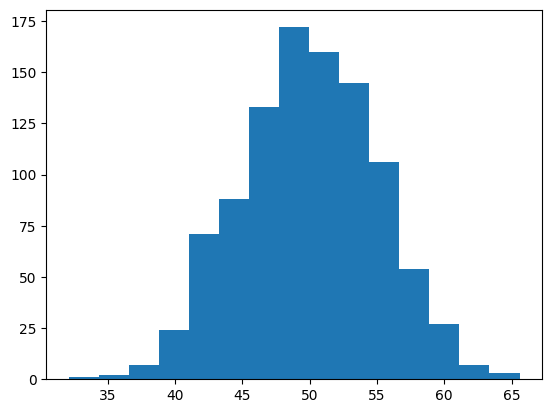

In [15]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=15)

In [16]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [17]:
# fit the distribution with the above parameters
from scipy.stats import norm
# dist = norm(60, 12)
dist = norm(sample_mean, sample_std)

In [18]:
values = np.linspace(sample.min(),sample.max(),100)

In [19]:
sample.max()

np.float64(65.59197055982553)

In [20]:
probabilities = [dist.pdf(value) for value in values]

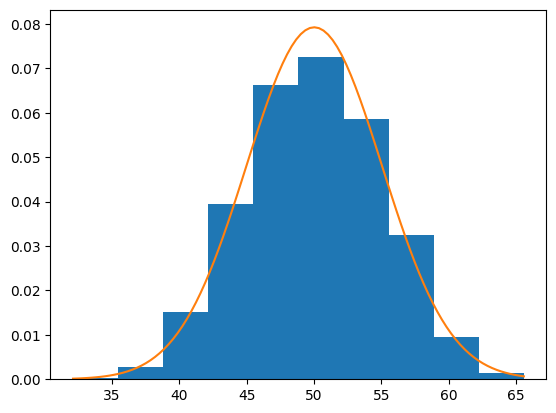

In [21]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

/tmp/ipython-input-1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

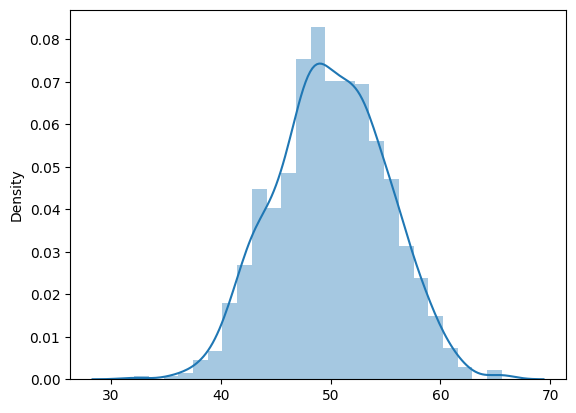

In [22]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [23]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [24]:
sample

array([28.03905835, 15.9914419 , 17.03728443, 14.08600339, 14.72406979,
       18.21474445, 11.06937564, 14.94832602, 17.83102601, 23.57867629,
       13.06405618, 24.61396721, 31.31691788, 28.33719704, 22.62394752,
       17.38144722, 13.90835255, 17.47386456, 18.22126702, 18.87858937,
       20.70657613, 22.26450763, 20.03691993, 17.41677047, 18.89421096,
       20.87303302, 15.23941734, 22.73474149,  6.18626162, 18.23064585,
       20.41249305, 18.14347092, 18.27204131, 16.79264173, 25.82989411,
       17.66102475, 31.28576943, 18.04312287, 16.73043705, 16.58666597,
       20.24984438, 31.95005645, 19.08800022, 12.27133672, 15.62475312,
       18.01219508, 18.48183232, 17.40020446, 23.01501775, 20.76682339,
       24.37921357, 16.1672347 , 15.01667104, 21.10420816, 27.81091895,
       17.036124  , 32.61228749,  8.48405091, 15.14701556, 25.1984228 ,
       18.39113059, 27.40858032, 20.87682647, 26.32555734, 23.52000512,
       22.20846813, 22.18325967, 23.20595934, 25.5551551 , 23.53

(array([ 2.,  1.,  2.,  1.,  3.,  9.,  8., 11., 18., 14., 14., 25., 31.,
        20., 31., 18., 16., 18., 18., 14.,  6., 13., 10.,  9., 16., 12.,
        27., 21., 37., 47., 54., 36., 55., 54., 62., 59., 41., 41., 35.,
        23., 22., 14., 11.,  8.,  3.,  4.,  3.,  1.,  0.,  2.]),
 array([ 6.18626162,  7.19637393,  8.20648625,  9.21659856, 10.22671088,
        11.23682319, 12.24693551, 13.25704783, 14.26716014, 15.27727246,
        16.28738477, 17.29749709, 18.3076094 , 19.31772172, 20.32783404,
        21.33794635, 22.34805867, 23.35817098, 24.3682833 , 25.37839561,
        26.38850793, 27.39862025, 28.40873256, 29.41884488, 30.42895719,
        31.43906951, 32.44918182, 33.45929414, 34.46940646, 35.47951877,
        36.48963109, 37.4997434 , 38.50985572, 39.51996804, 40.53008035,
        41.54019267, 42.55030498, 43.5604173 , 44.57052961, 45.58064193,
        46.59075425, 47.60086656, 48.61097888, 49.62109119, 50.63120351,
        51.64131582, 52.65142814, 53.66154046, 54.67165277,

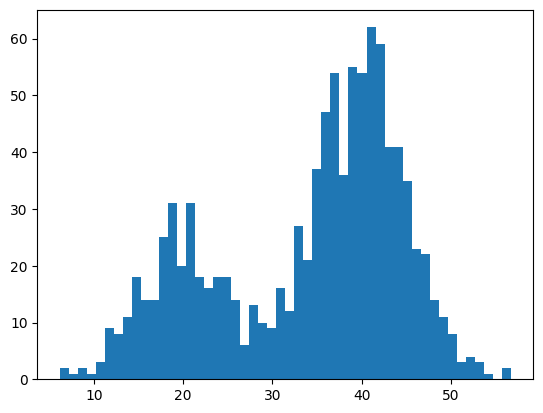

In [25]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [34]:
from sklearn.neighbors import KernelDensity

# model = KernelDensity(bandwidth=5, kernel='gaussian')
model = KernelDensity(bandwidth=2, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=2)

In [35]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [36]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

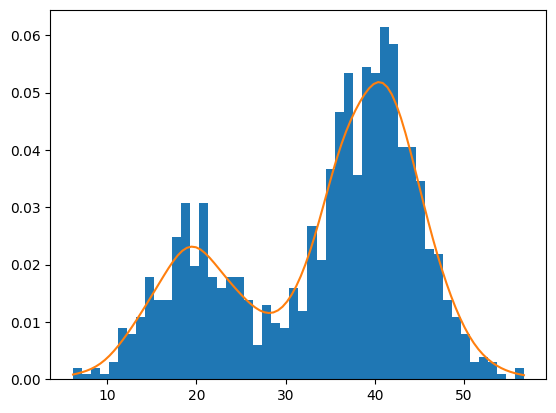

In [37]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

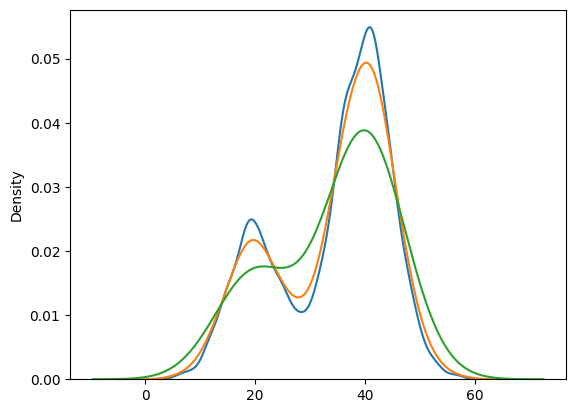

In [41]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.5)
sns.kdeplot(sample.reshape(1000),bw_adjust=1)
sns.kdeplot(sample.reshape(1000),bw_adjust=2)

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

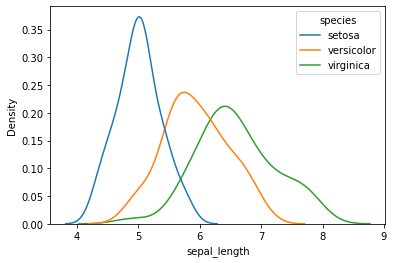

In [ ]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

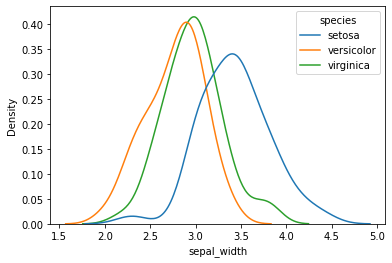

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

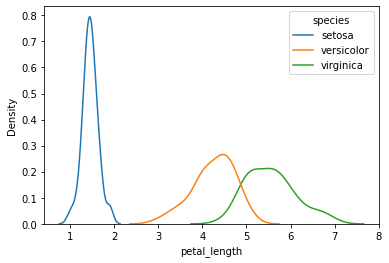

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

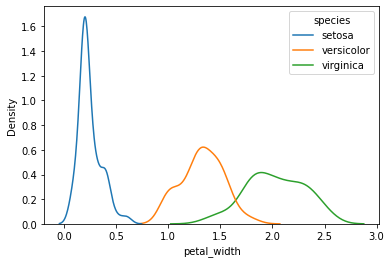

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

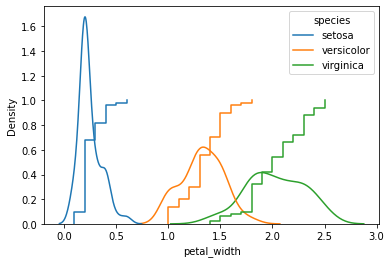

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

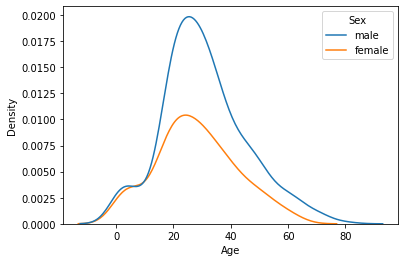

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

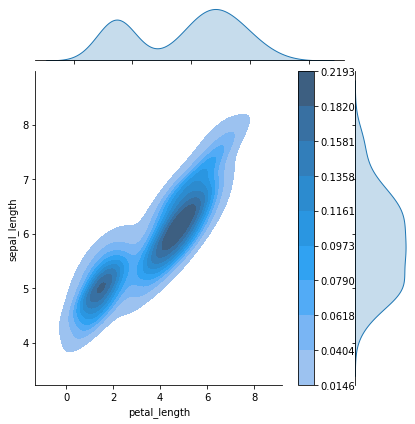

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

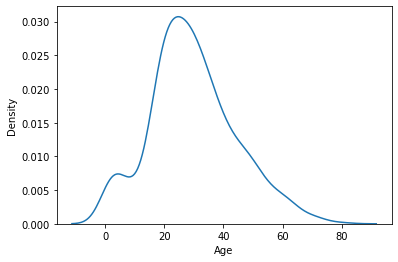

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

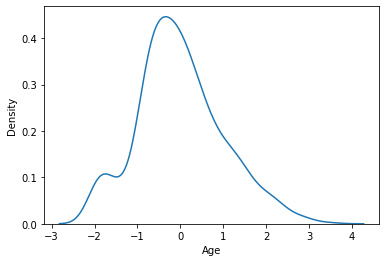

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0